Kien Truong
<br>
CPSC 483-02
<br>
Professor Avery
<br>
Due date: 3/12/2021
<br>
$$ Project #2 description $$
<br>
This project utilizes numpy library to implement vectorized linear regression and compare their performace (MSE) using separate training and validation sets. This project will be using $ boston.npz $ as a dataset to examine how different housing features affect the median price of homes.
<br>
Steps approached:
1. Use the NumPy $ load() $ method to read the dataset.
2. Set aside the first 102 items as a validation set, and the remaining 404 items for training set.
3. Create a scatterplot of the training data to examine the relationship between the number of rooms and the median value of a home.
4. Compute $ w $ for the training set using RM as $ X $ and MEDV as $ t $
5. Use $ w $ to find the least square line to fit the scatterplot.
6. Use $ w $ to find the predicted value in the training set, then find the average loss $ \mathcal{L} $
7. Use $ w $ to find the predicted value in the validation set, then find the average loss $ \mathcal{L} $
8. Find $ w $ and $ \mathcal{L} $ using all 13 input features as $ X $, then compare.
9. Use $ w $ found in step 8, determine(in dollars) for each feature how much a one unit increase in that feature would change the median value of a home.
10. Determine the most important features in the dataset

In [1]:
import numpy as np
'''
Question 1 -- using numpy load() method to read data
'''
data = np.load('boston.npz')
x = data['features']
t = data['target'][:,None]

In [2]:
'''
Question 2 -- generating validation set and training set
'''
x_validation = x[:102]  #Sets aside the first 102 x items as validation set
t_validation = t[:102]  #Sets aside the first 102 t items as validation set

x_training   = x[102:]  #sets the remaining 404 x items for training
t_training   = t[102:]  #sets the remaining 404 t items for training
# print(x_training)

The relationship between the number of rooms and the median of a home seems to be linear with some outliers


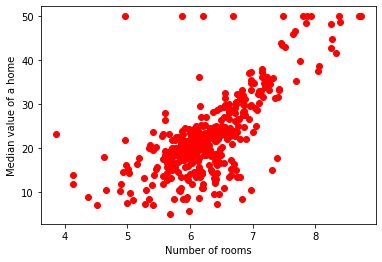

In [3]:
'''
Question 3 -- creating a scatterplot number of rooms and the median value of a home 
'''
import pylab as plt
%matplotlib inline
x_room = x_training[:, 5][:,None]
# print(x_room)
plt.plot(x_room, t_training, 'ro')
plt.xlabel("Number of rooms")
plt.ylabel("Median value of a home")
print("The relationship between the number of rooms and the median of a home seems to be linear with some outliers")

In [4]:
'''
Question 4 -- compute w_hat for the training set given RM as X and MEDV as t
'''
X = np.hstack((np.ones_like(x_room), x_room))
XX = np.dot(X.T, X)
XX_inv = np.linalg.inv(XX)
Xt = np.dot(X.T, t_training)
w_hat = np.dot(XX_inv, Xt)
print(f'The equation for MEDV as a linear function of RM is: MEDV = {w_hat[0][0]} + {w_hat[1][0]}(RM)')
# print(w_hat)

The equation for MEDV as a linear function of RM is: MEDV = -34.12731480918205 + 9.03591206114686(RM)


The model seems to fit the training set. There are some outliers in the plot, but most of the data points are      densely concentrated near the least square line


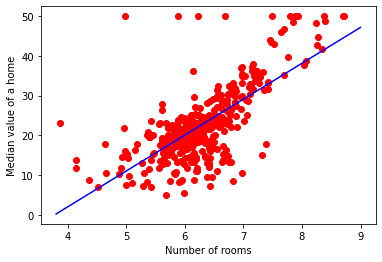

In [5]:
'''
Question 5 -- adding a least square line using w_hat
'''
import pylab as plt
%matplotlib inline
x_room = x_training[:, 5][:,None]
plt.plot(x_room, t_training, 'ro')
plt.xlabel("Number of rooms")
plt.ylabel("Median value of a home")
#---- Generating points to plot a least square line ----
xtest = np.linspace(3.8, 9, 100)[:,None] #2D np array
Xtest = np.hstack((np.ones_like(xtest), xtest))
ttest = np.dot(Xtest, w_hat) #t_hat = X . w
plt.plot(xtest, ttest, 'b')
print("The model seems to fit the training set. There are some outliers in the plot, but most of the data points are\
      densely concentrated near the least square line")

In [6]:
'''
Question 6 -- Compute the average loss using w_hat on the training set
'''
t_hat = np.dot(X, w_hat)  #Finding predicted values given X and w_hat
MSE = (1/(t_hat.size)) * (np.dot((t_training-t_hat).T, t_training-t_hat))
print(f"MSE of training set is {MSE[0][0]}")

MSE of training set is 41.05654883138219


In [7]:
'''
Question 7 -- Repeat question 6 for the validation set
'''
x_room_validation = x_validation[:, 5][:,None]
X_validation = np.hstack((np.ones_like(x_room_validation), x_room_validation))
t_hat = np.dot(X_validation, w_hat)
MSE_validation = (1/(t_hat.size))*np.dot((t_validation-t_hat).T, t_validation-t_hat)
print(f"MSE of validation set is {MSE_validation[0][0]}")
print("The validation MSE is larger than the training MSE because the parameters w are generated using the training\
 set. The validation set is not used to find the parameters w that minimize the loss")

MSE of validation set is 53.76787795542337
The validation MSE is larger than the training MSE because the parameters w are generated using the training set. The validation set is not used to find the parameters w that minimize the loss


In [8]:
'''
Question 8 -- Repeats step 4,6,and 7 using all 13 inputs features as X
'''
import numpy as np
data = np.load('boston.npz')
x = data['features']
t = data['target'][:,None]

x_validation = x[:102]  #Sets aside the first 102 x items as validation set
t_validation = t[:102]  #Sets aside the first 102 y items as validation set
x_training   = x[102:]  #sets the remaining 404 x items for training
t_training   = t[102:]  #sets the remaining 404 y items for training

'''
--- TRAINING SET ---
 * Finds w_hat
 * Finds predicted values and its average loss
'''
#Finds w_hat
ones = np.ones(404)[:,None]
X = np.hstack((ones, x_training))
XX = np.dot(X.T, X)
XX_inv = np.linalg.inv(XX)
Xt = np.dot(X.T, t_training)
w_hat = np.dot(XX_inv, Xt)
print(f"w_hat values are \n{w_hat}\n")
#Finds predicted values and average loss
t_hat = np.dot(X, w_hat)
MSE = (1/404) * np.dot((t_training-t_hat).T, t_training-t_hat)
print(f"MSE for the training set is {MSE[0][0]}")

'''
--- VALIDATION SET ---
 * Uses w_hat of training set to find predicted values and average loss
'''
ones = np.ones(102)[:,None]
X = np.hstack((ones, x_validation))
#Finds predicted values and average loss
t_hat = np.dot(X, w_hat)
MSE = (1/102) * np.dot((t_validation-t_hat).T, t_validation-t_hat)
print(f"MSE for the validation set is {MSE[0][0]}")
print("The training and test MSE for this model are much lower than the previous model. One explanation would be\
 the use of 13 features in this model vs. 1 feature in the previous model, which further enhances the search of\
  parameters that minimize the loss in general.")

w_hat values are 
[[ 3.19642409e+01]
 [-1.14552861e-01]
 [ 4.48932130e-02]
 [ 2.83755698e-02]
 [ 2.70909742e+00]
 [-1.67403672e+01]
 [ 4.11148209e+00]
 [-8.47905081e-04]
 [-1.38493905e+00]
 [ 3.21084569e-01]
 [-1.22497115e-02]
 [-9.12523500e-01]
 [ 1.02533638e-02]
 [-4.78414631e-01]]

MSE for the training set is 21.807199582316606
MSE for the validation set is 22.863680896366844
The training and test MSE for this model are much lower than the previous model. One explanation would be the use of 13 features in this model vs. 1 feature in the previous model, which further enhances the search of  parameters that minimize the loss in general.


In [9]:
'''
Question 9 - how much does a one unit increase in each feature change the median value of the home? Convert to dollars
'''
#Put this in a loop
features = ['none', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
            'B', 'LSTAT']
for i in range(1, len(w_hat)):
    print(f"A one unit increase in feature {features[i]} will change the median home value of {round(w_hat[i][0]*1000,2)} dollars")

A one unit increase in feature CRIM will change the median home value of -114.55 dollars
A one unit increase in feature ZN will change the median home value of 44.89 dollars
A one unit increase in feature INDUS will change the median home value of 28.38 dollars
A one unit increase in feature CHAS will change the median home value of 2709.1 dollars
A one unit increase in feature NOX will change the median home value of -16740.37 dollars
A one unit increase in feature RM will change the median home value of 4111.48 dollars
A one unit increase in feature AGE will change the median home value of -0.85 dollars
A one unit increase in feature DIS will change the median home value of -1384.94 dollars
A one unit increase in feature RAD will change the median home value of 321.08 dollars
A one unit increase in feature TAX will change the median home value of -12.25 dollars
A one unit increase in feature PTRATIO will change the median home value of -912.52 dollars
A one unit increase in feature B

In [10]:
'''
Question 10 - Based on the amount of change in the value of a home, which features are most important
'''
# w_hat = w_hat.flatten()
# sorted_list = np.sort(w_hat)
# print(sorted_list)
print("Features NOX and RM are the most important features. NOX feature has the largest negative coefficient \
of -16.74. The second most important feature RM has the largest positive coefficient of 4.11 ")

Features NOX and RM are the most important features. NOX feature has the largest negative coefficient of -16.74. The second most important feature RM has the largest positive coefficient of 4.11 
